![](../lab%20header%20image.png)

<div style="text-align: center;">
    <h3>Experiment No. 03</h3>
</div>

<img src="../Student%20Information.png" style="width: 100%;" alt="Student Information">

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>AIM</strong>
</div>

**To perform conversion of RGB Image to Grayscale Image**

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>Theory/Procedure/Algorithm</strong>
</div>

Converting an RGB image to grayscale is a common technique in image processing. It reduces the color information to a single intensity value for each pixel, simplifying the image while retaining its essential structure. Various methods can be used, ranging from simple averaging of the RGB channels to more sophisticated techniques that account for human visual perception, like the weighted method. This process is useful in applications like image compression, edge detection, and enhancing computational efficiency. blue.


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load the RGB image
image = cv2.imread('image.jpg')

# Convert the image from BGR to RGB (since OpenCV loads it as BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
# Function to display images side by side
def display_images(original, grayscale, method_name):
    plt.figure(figsize=(8, 3))

    # Display Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original RGB Image')
    plt.axis('off')

    # Display Grayscale Image
    plt.subplot(1, 2, 2)
    plt.imshow(grayscale, cmap='gray')
    plt.title(f'Grayscale Image ({method_name})')
    plt.axis('off')

    plt.show()

#### 1. Average Method
In this method, the grayscale value is obtained by averaging the Red, Green, and Blue (RGB) channels. Each color contributes equally to the final grayscale value.

**Formula:**
$$
\text{Gray} = \frac{R + G + B}{3}
$$

**Explanation:**
- The average method is simple but doesn't account for the fact that the human eye perceives some colors (like green) more strongly than others (like blue).
- All three color channels contribute equally to the grayscale intensity, which can result in an image that may not reflect human perception accurately.
  
**Use Case:**  
Good for quick conversions where performance is more critical than visual accuracy.

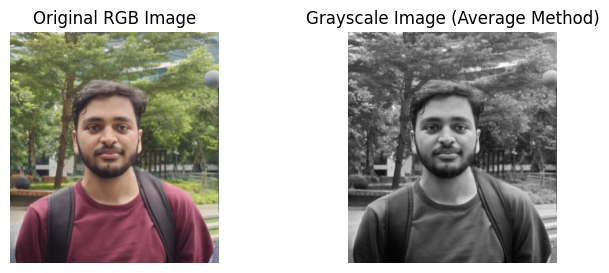

In [4]:
gray_image_average = np.mean(image_rgb, axis=2)
display_images(image_rgb, gray_image_average, "Average Method")

#### 2. Weighted Method (Luminance)
This method accounts for the fact that human eyes are more sensitive to green light than to red or blue. It applies different weights to the RGB channels based on human perception.

**Formula:**
$$
\text{Gray} = 0.2989 \times R + 0.5870 \times G + 0.1140 \times B
$$

**Explanation:**
- The weighted method is based on the human visual system's response to different colors. The green channel has the highest weight because humans are more sensitive to green light.
- Red has a medium weight, and blue has the lowest weight.
- This method produces grayscale images that are closer to how humans perceive brightness.

**Use Case:**  
Best for applications where visual perception accuracy is important, such as image processing for photography.


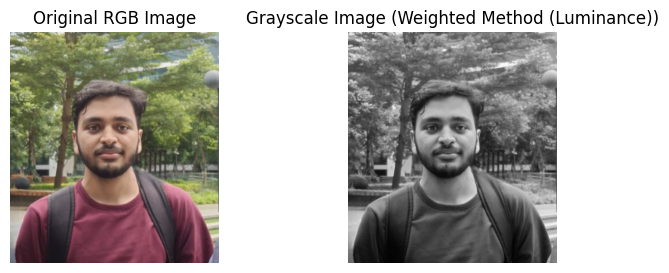

In [5]:
gray_image_weighted = 0.2989 * image_rgb[:, :, 0] + 0.5870 * image_rgb[:, :, 1] + 0.1140 * image_rgb[:, :, 2]
display_images(image_rgb, gray_image_weighted, "Weighted Method (Luminance)")

#### 3. Luminosity Method
Similar to the weighted method, but it uses different weights for the RGB channels. These weights are derived from different studies of human visual perception.

**Formula:**
$$
\text{Gray} = 0.21 \times R + 0.72 \times G + 0.07 \times B
$$

**Explanation:**
- Like the luminance method, it gives more importance to the green channel, but the exact weights differ slightly.
- This method can be thought of as an alternative to the standard luminance method with slightly different results, but still more perceptually accurate than the average method.

**Use Case:**  
Useful in situations where small variations in grayscale intensity are important, and where color perception matters.


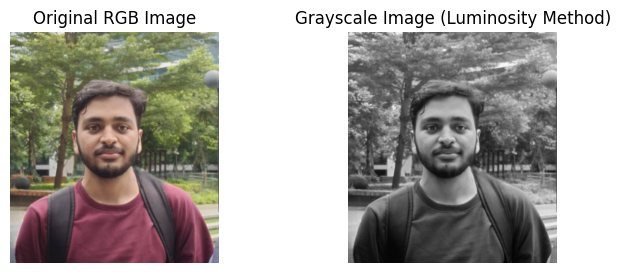

In [6]:
gray_image_luminosity = 0.21 * image_rgb[:, :, 0] + 0.72 * image_rgb[:, :, 1] + 0.07 * image_rgb[:, :, 2]
display_images(image_rgb, gray_image_luminosity, "Luminosity Method")

#### 4. Using OpenCV's cv2.cvtColor()
OpenCV provides a built-in function `cv2.cvtColor()` to convert an image from one color space to another. The function uses the standard weighted method (Luminance) to convert an RGB image to grayscale.

**Formula:**  
The formula used is similar to the weighted method:
$$
\text{Gray} = 0.2989 \times R + 0.5870 \times G + 0.1140 \times B
$$

**Explanation:**
- OpenCV implements an optimized conversion that uses the weighted method internally.
- This is a highly optimized and widely used approach for converting RGB images to grayscale.

**Use Case:**  
Best for real-time applications or when using OpenCV for various image processing tasks. Fast and optimized.


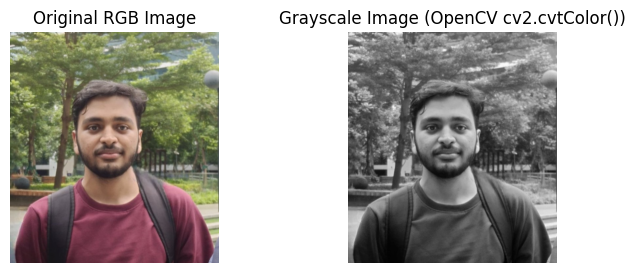

In [7]:
gray_image_opencv = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_images(image_rgb, gray_image_opencv, "OpenCV cv2.cvtColor()")

#### 5. Single Channel Extraction (Green Channel)
In this method, only one channel (typically green) is extracted from the image, and this single channel is treated as the grayscale image.

**Formula:**
$$
\text{Gray} = G
$$

**Explanation:**
- Since the human eye is most sensitive to green, extracting only the green channel can be a quick and reasonable approximation for grayscale conversion.
- This method completely ignores the red and blue channels, which may result in a loss of information in some images.

**Use Case:**  
Useful in computationally constrained environments or when the green channel contains most of the relevant intensity information.


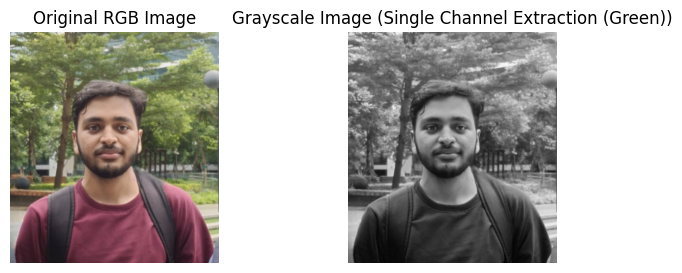

In [8]:
gray_image_single_channel = image_rgb[:, :, 1]  # Green channel
display_images(image_rgb, gray_image_single_channel, "Single Channel Extraction (Green)")

#### RGB to Grayscale Table

| **Method**               | **Formula**                                                           | **Explanation**                                                    |
|--------------------------|----------------------------------------------------------------------|--------------------------------------------------------------------|
| **Average Method**        | $$\text{Gray} = \frac{R + G + B}{3}$$                                | Simple averaging of the RGB channels, ignores human perception.     |
| **Weighted Method**       | $$\text{Gray} = 0.2989 \times R + 0.5870 \times G + 0.1140 \times B$$ | Accounts for human perception, commonly used in image processing.   |
| **Lightness Method**      | $$\text{Gray} = \frac{\max(R, G, B) + \min(R, G, B)}{2}$$            | Focuses on extremes, good for high contrast, artistic images.       |
| **Luminosity Method**     | $$\text{Gray} = 0.21 \times R + 0.72 \times G + 0.07 \times B$$      | Similar to weighted method with slightly different weights.         |
| **Desaturation Method**   | $$\text{Gray} = \frac{R + G + B}{3}$$                                | Equal weighting of RGB channels, produces a uniform grayscale image.|
| **OpenCV cvtColor()**     | $$\text{Gray} = 0.2989 \times R + 0.5870 \times G + 0.1140 \times B$$ | Fast, optimized, and widely used built-in OpenCV function.          |
| **Single Channel (Green)**| $$\text{Gray} = G$$                                                  | Uses only the green channel for grayscale conversion.               |
| **Matplotlib Grayscale**  | (Visual Only)                                                        | For display purposes only, doesn't alter the image data.            |

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>CONCLUSION</strong>
</div>

This experiment demonstrates various methods for converting an RGB image to grayscale, each with its own advantages. The weighted method (luminance) closely matches human visual perception, making it ideal for most applications. Simpler methods, like the average or desaturation, offer faster performance but may lack accuracy in brightness representation. The choice of method depends on the specific requirements of the task, whether it's speed, visual fidelity, or computational simplicity.

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>ASSESSMENT</strong>
</div>

<img src="../marks_distribution.png" style="width: 100%;" alt="marks_distribution">